In [20]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [21]:
from matplotlib import pyplot as plt
import numpy as np

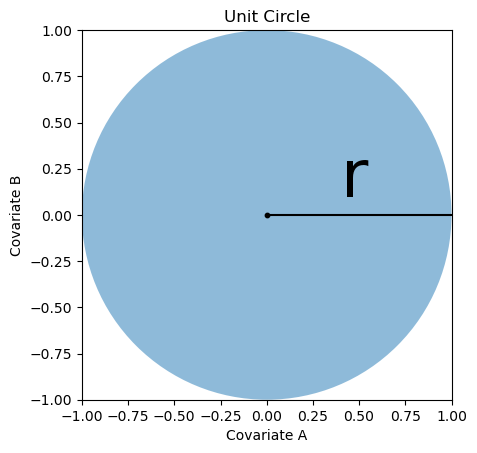

In [22]:
def make_circle(point=0):
    fig = plt.gcf()
    ax = fig.add_subplot(111, aspect='equal')
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5))
    ax.scatter(0,0,s=10,color='black')
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black")
    ax.text(.4,.1,"r",size=48)
    ax.set_xlim(left=-1, right=1)
    ax.set_ylim(bottom=-1,top=1)
    plt.xlabel("Covariate A")
    plt.ylabel("Covariate B")
    plt.title("Unit Circle")

    if point:
        ax.text(.55,.9,"Far away",color="purple")
        ax.scatter(.85,.85,s=10,color="purple")
    else: 
        plt.show()

make_circle()

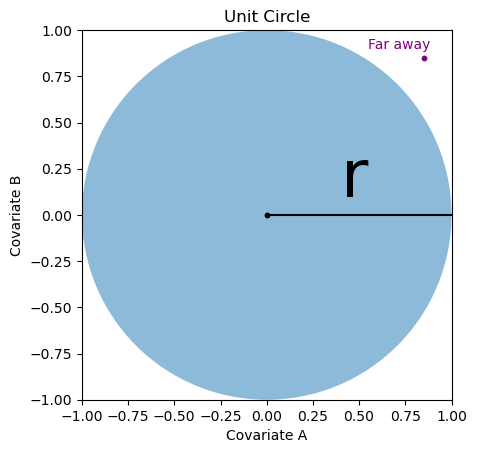

In [23]:
make_circle(1)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

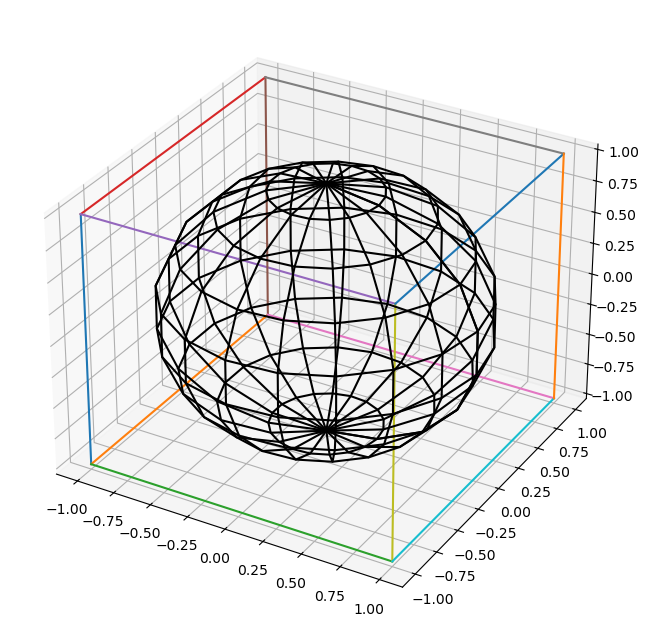

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

r = [-1,1]

for s,e in combinations(np.array(list(product(r,r,r))),2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e))

u,v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="black");

In [26]:
# Draw a sample of data in two dimensions
sample_data = np.random.sample((5,2))
print("Sample data:\n", sample_data, '\n')

def norm(x): 
    ''' Measure the distance of each point from the origin.
    
    Input: Sample points, one point per row
    Output: The distance from the origin to each point
    '''
    return np.sqrt( (x**2).sum(1) ) # np.sum() sums an array over a given axis 

def in_the_ball(x): 
    ''' Determine if the sample is in the circle. 
    
    Input: Sample points, one point per row
    Output: A boolean array indicating whether the point is in the ball
    '''
    return norm(x) < 1 # If the distance measure above is <1, we're inside the ball


for x, y in zip(norm(sample_data),in_the_ball(sample_data)):
    print("Norm = ", x.round(2), "; is in circle? ", y)

Sample data:
 [[0.66943726 0.06573558]
 [0.49804301 0.00149654]
 [0.279994   0.63085916]
 [0.83173114 0.7610501 ]
 [0.03641495 0.45748925]] 

Norm =  0.67 ; is in circle?  True
Norm =  0.5 ; is in circle?  True
Norm =  0.69 ; is in circle?  True
Norm =  1.13 ; is in circle?  False
Norm =  0.46 ; is in circle?  True


In [27]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean()
                     for iteration in range(100)])
    return data.mean()

dims = range(2,15)
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims)))


for dim, percent in zip(dims,data):
    print("Dimension = ", dim, "; percent in ball = ", percent)

Dimension =  2 ; percent in ball =  0.785534
Dimension =  3 ; percent in ball =  0.523559
Dimension =  4 ; percent in ball =  0.308249
Dimension =  5 ; percent in ball =  0.164678
Dimension =  6 ; percent in ball =  0.080374
Dimension =  7 ; percent in ball =  0.03677999999999999
Dimension =  8 ; percent in ball =  0.015871
Dimension =  9 ; percent in ball =  0.006435000000000001
Dimension =  10 ; percent in ball =  0.002497
Dimension =  11 ; percent in ball =  0.000886
Dimension =  12 ; percent in ball =  0.00033200000000000005
Dimension =  13 ; percent in ball =  0.00012
Dimension =  14 ; percent in ball =  3.1e-05


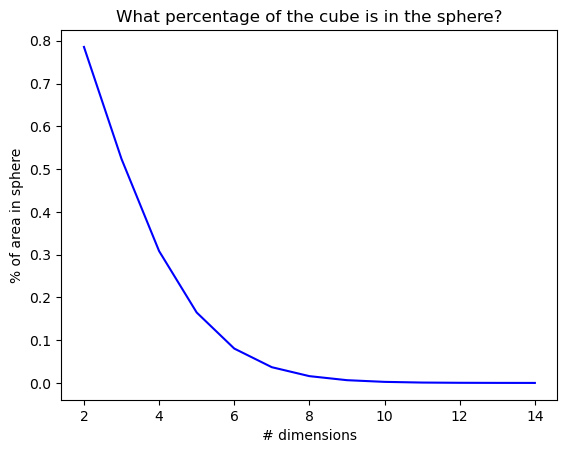

In [28]:
# Let's plot the above percentages 

plt.plot(dims, data, color='blue')
plt.xlabel("# dimensions")
plt.ylabel("% of area in sphere")
plt.title("What percentage of the cube is in the sphere?")
plt.show()

In [29]:
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet 
    of those random points to the center of the data '''
    points = np.random.sample((sample_size,dimension))-.5   # centering our data
    return np.min(norm(points))

def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find 
        that sample's closest point to the center of the data. 
        Repeat 100 times for the given dimension and return the min/max/mean 
        of the distance for the nearest point. '''
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()

# Calculate for dimensions 2-100
dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

# Test it for dimension 6
print("For dimension 6: ", estimate_closest(6))

For dimension 6:  (0.22713843100560777, 0.10825579286307828, 0.31226406134880635)


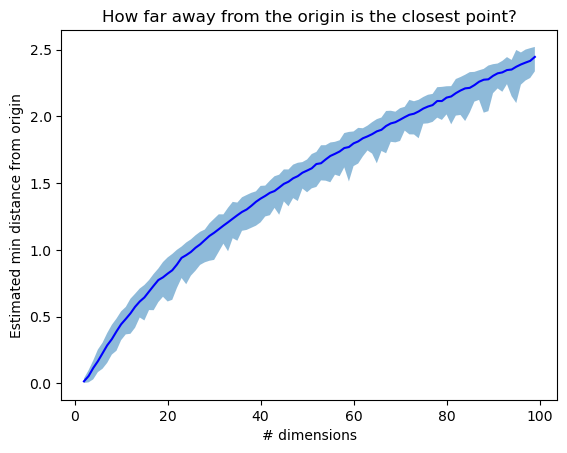

In [30]:
# Plot the min/max/mean of the closest point for each dimension using sampling 

plt.plot(dims,min_distance_data[:,0], color='blue')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("# dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away from the origin is the closest point?"); 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

Este código utiliza la función make_classification de la librería scikit-learn para generar un conjunto de datos sintético que se puede usar en tareas de clasificación supervisada, generalmente para entrenar y evaluar modelos de machine learning.

In [32]:
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=2)

In [33]:
rng = np.random.RandomState(2)

X += 2*rng.uniform(size=X.shape)

In [34]:
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=42)

In [35]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [36]:
print("Score from two-feature classifier: ", score)


Score from two-feature classifier:  0.875


In [37]:
X, y = make_classification(n_features=200, n_redundant=0, n_informative=200,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [38]:
print("Score from 200-feature classifier: ", score)


Score from 200-feature classifier:  0.475
